El trabajo esta basado en diferentes competencias y retos sobre Analítica de productos.
sitio: https://www.codenong.com/
Libros: 

## Reto 
### Analizando los productos
Cambiaremos la forma en que analizamos el comportamiento del cliente y comenzaremos a discutir cómo usar la ciencia de datos para un análisis más refinado a nivel de producto. Cada vez más empresas (especialmente empresas de comercio electrónico) tienen un interés y una demanda cada vez mayores por utilizar datos para comprender cómo los clientes interactúan e interactúan con diferentes productos. Se ha demostrado que un análisis riguroso de los productos puede ayudar a las empresas a mejorar la participación de los usuarios y las tasas de conversión, lo que en última instancia conduce a mayores ganancias. En esta parte del proyecto, discutiremos qué es el análisis de productos y cómo usarlo para diferentes casos de uso.

El análisis de productos es un método para obtener información a partir de los datos, que se relacionan con la forma en que los clientes interactúan e interactúan con los productos proporcionados, el rendimiento de los diferentes productos y ciertas debilidades y ventajas que se pueden observar en la empresa. 
Sin embargo, el análisis de productos no se limita a analizar datos. El objetivo final del análisis de productos es, en realidad, establecer conocimientos e informes viables, que pueden ayudar a optimizar y mejorar el rendimiento del producto y generar nuevas ideas de marketing o productos basadas en los resultados del análisis del producto. 
El análisis de productos comienza con el seguimiento de eventos. Estos eventos pueden ser las visitas al sitio web del cliente, las páginas vistas, el historial del navegador, las compras o cualquier otra acción que el cliente pueda realizar en los productos que usted ofrece. 
Luego, podemos comenzar a analizar y visualizar cualquier patrón observable en estos eventos, con el objetivo de crear información o informes procesables.
 Algunos objetivos comunes del análisis de productos son los siguientes:

1. Mejore la tasa de retención de clientes y productos
Al analizar los clientes que vieron y compraron, puede determinar los productos que los clientes compraron repetidamente y los clientes que son clientes habituales. Por otro lado, también puede determinar qué productos no compran los clientes y qué clientes están en riesgo de abandono. Analizar y comprender los atributos comunes de las compras repetidas y los clientes habituales puede ayudarlo a mejorar su estrategia de retención.

2. Identificar productos populares y de tendencia
Como comercializador de una empresa minorista, es importante tener un buen conocimiento de los productos populares y de tendencia. Estos productos más vendidos son la principal fuente de ingresos para el negocio y brindan nuevas oportunidades de ventas, como ventas cruzadas o paquetes. Con la ayuda del análisis de productos, es fácil identificar y rastrear estos productos comunes y populares, y utilizar estos productos más vendidos para generar nuevas estrategias para explorar diferentes oportunidades.

* Segmentación
de clientes y productos basada en atributos clave de clientes y productos Con la ayuda de perfiles de clientes y datos de productos, podemos utilizar el análisis de productos para segmentar grupos de clientes y productos en función de los atributos de clientes y productos. Algunos métodos para segmentar los datos de productos se basan en su rentabilidad, volumen de ventas, volumen de pedidos y volumen de reembolso. A través de estos segmentos, podemos obtener información factible sobre el producto o la segmentación de clientes a posicionar a continuación.

* Desarrollar una estrategia de marketing con un ROI más alto
El análisis de productos también se puede utilizar para analizar el retorno de la inversión (ROI) de una estrategia de marketing. Al analizar los gastos de marketing gastados en la promoción de ciertos artículos y los ingresos generados por estos productos, podemos comprender qué funciona y qué no. El uso del análisis de productos para el análisis del ROI de marketing puede ayudar a crear estrategias de marketing más efectivas.

Entonces, veremos cómo rastrear la tendencia de productos populares a lo largo del tiempo y luego trataremos brevemente cómo usar estos datos de productos populares para la recomendación de productos en estrategias de marketing.

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

# 1. Load Data

Conectamos con el archivo excel, leemos las 2 hojas disponibles y luego la concatenamos.

In [3]:
retail_ol_h1= pd.read_excel(io='./data/online_retail_II.xlsx', sheet_name='Year 2010-2011')
retail_ol_h2= pd.read_excel(io='./data/online_retail_II.xlsx', sheet_name='Year 2009-2010')

In [4]:
frames = [retail_ol_h1, retail_ol_h2]
results = pd.concat(frames)
df = results.copy()

In [5]:
df.shape

(1067371, 8)

In [6]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# 2. Product Analytics

#### - Quantity Distribution

Distribución de cantidad

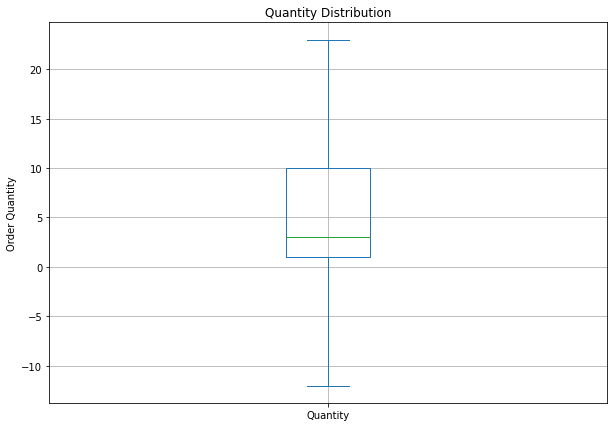

In [7]:
ax = df['Quantity'].plot.box(
    showfliers=False,
    grid=True,
    figsize=(10, 7)
)

ax.set_ylabel('Order Quantity')
ax.set_title('Quantity Distribution')

plt.suptitle("")
plt.show()

In [25]:
pd.DataFrame(df['Quantity'].describe())

,Quantity
count,1.019285e+06
mean,1.114263e+01
std,1.034844e+02
min,1.000000e+00
25%,1.000000e+00
50%,3.000000e+00
75%,1.100000e+01
max,7.421500e+04



Hay registros con valores negativos en la columna Cantidad, que representan pedidos cancelados. Ignoremos y eliminemos estos registros. Podemos filtrar todos estos registros en nuestro DataFrame simplemente eligiendo los Quantity que sean mayores a 0

In [26]:
df.loc[df['Quantity'] > 0].shape

(1019285, 8)

In [27]:
df.shape

(1019285, 8)

In [28]:
df = df.loc[df['Quantity'] > 0]

#### - Time-series Number of Orders

Serie temporal Número de pedidos

In [29]:
monthly_orders_df = df.set_index('InvoiceDate')['Invoice'].resample('M').nunique()

Como puede ver en este código, estamos usando las  funciones resample y nunique. La función resample vuelve a muestrear y convierte los datos de series de tiempo en la frecuencia que deseamos. En nuestro ejemplo, estamos volviendo a muestrear nuestros datos de series de tiempo en datos de series de tiempo mensuales, utilizando 'M'como nuestra frecuencia objetivo y contando el número de números de factura distintos o únicos. De esta forma, podemos obtener el número de compras o pedidos únicos mes a mes. El DataFrame resultante :

In [30]:
monthly_orders_df

InvoiceDate
2009-12-31    1839
2010-01-31    1205
2010-02-28    1282
2010-03-31    1770
2010-04-30    1513
2010-05-31    1642
2010-06-30    1719
2010-07-31    1585
2010-08-31    1511
2010-09-30    1911
2010-10-31    2371
2010-11-30    2868
2010-12-31    1629
2011-01-31    1120
2011-02-28    1126
2011-03-31    1531
2011-04-30    1318
2011-05-31    1731
2011-06-30    1576
2011-07-31    1540
2011-08-31    1409
2011-09-30    1896
2011-10-31    2129
2011-11-30    2884
Freq: M, Name: Invoice, dtype: int64

A menudo las series de tiempo se puede entender mejor visualizando, utilizando gráficos de lineas

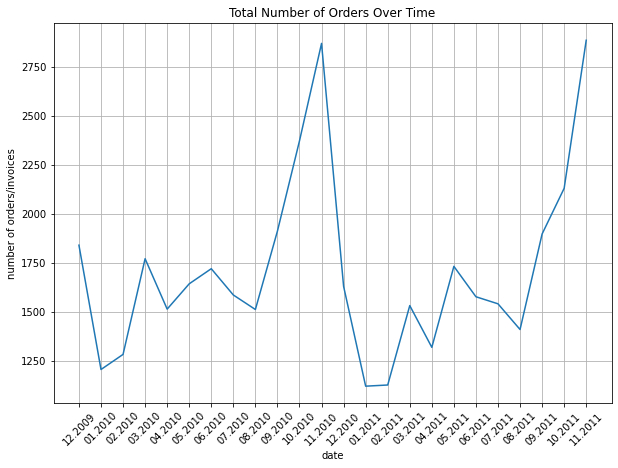

In [31]:
ax = pd.DataFrame(monthly_orders_df.values).plot(
    grid=True,
    figsize=(10,7),
    legend=False
)

ax.set_xlabel('date')
ax.set_ylabel('number of orders/invoices')
ax.set_title('Total Number of Orders Over Time')

plt.xticks(
    range(len(monthly_orders_df.index)), 
    [x.strftime('%m.%Y') for x in monthly_orders_df.index], 
    rotation=45
)

plt.show()

Como puede observar en este gráfico, las etiquetas de marca en el eje x  están formateadas por mes y año. Si mira hacia atrás en el código anterior, los formateamos usando  x.strftime('%m.%Y'), donde xestá el Python dateobjeto,  %mes el marcador de posición para el valor del mes y %Yes el marcador de posición para el valor del año. La strftimefunción del  Python dateobjeto formatea la fecha en el formato dado.

Una cosa que se nota en este gráfico es que hay una caída radical repentina en el número de pedidos en diciembre de 2011. Si observa de cerca los datos, esto se debe simplemente a que no tenemos los datos para el mes completo de diciembre de 2011.

Podemos verificar esto usando el siguiente código.

In [32]:
invoice_dates = df.loc[
    df['InvoiceDate'] >= '2011-12-01',
    'InvoiceDate'
]

En este código, obtenemos una serie de todas las fechas de facturación desde el 1 de diciembre de 2011. Luego, imprimimos las fechas mínima y máxima. Cuando ejecute este código, obtendrá el siguiente resultado:

In [34]:
print('Min date: %s\nMax date: %s' % (invoice_dates.min(), invoice_dates.max()))

Min date: NaT
Max date: NaT


Como puede ver en este resultado, solo tenemos los datos del 1 de diciembre al 9 de diciembre de 2011. Sería una tergiversación si usamos estos datos para analizar las ventas y los ingresos de diciembre. Para realizar análisis adicionales , ignoraremos los datos del  1 de diciembre de 2011. Puede utilizar el siguiente código para eliminar esos puntos de datos.

In [35]:
df.loc[df['InvoiceDate'] < '2011-12-01'].shape

(1019285, 8)

In [36]:
df.shape

(1019285, 8)

In [37]:
df = df.loc[df['InvoiceDate'] < '2011-12-01']

In [38]:
monthly_orders_df = df.set_index('InvoiceDate')['Invoice'].resample('M').nunique()

In [39]:
monthly_orders_df

InvoiceDate
2009-12-31    1839
2010-01-31    1205
2010-02-28    1282
2010-03-31    1770
2010-04-30    1513
2010-05-31    1642
2010-06-30    1719
2010-07-31    1585
2010-08-31    1511
2010-09-30    1911
2010-10-31    2371
2010-11-30    2868
2010-12-31    1629
2011-01-31    1120
2011-02-28    1126
2011-03-31    1531
2011-04-30    1318
2011-05-31    1731
2011-06-30    1576
2011-07-31    1540
2011-08-31    1409
2011-09-30    1896
2011-10-31    2129
2011-11-30    2884
Freq: M, Name: Invoice, dtype: int64

Ahora que hemos filtrado los datos incompletos de diciembre de 2011, podemos volver a dibujar el gráfico de líneas utilizando los códigos anteriores. Después de eliminar esos puntos de datos de diciembre de 2011, el gráfico de líneas tiene el siguiente aspecto:

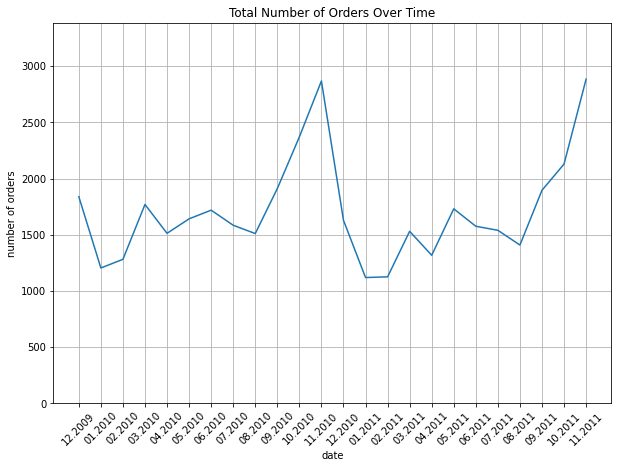

In [40]:
ax = pd.DataFrame(monthly_orders_df.values).plot(
    grid=True,
    figsize=(10,7),
    legend=False
)

ax.set_xlabel('date')
ax.set_ylabel('number of orders')
ax.set_title('Total Number of Orders Over Time')

ax.set_ylim([0, max(monthly_orders_df.values)+500])

plt.xticks(
    range(len(monthly_orders_df.index)), 
    [x.strftime('%m.%Y') for x in monthly_orders_df.index], 
    rotation=45
)

plt.show()

Echemos un vistazo más de cerca a este gráfico . El número mensual de pedidos parece flotar alrededor de 1.500 desde diciembre de 2010 hasta agosto de 2011, y luego aumenta significativamente desde septiembre de 2011, y casi se duplica en noviembre de 2011. Una explicación de esto podría ser que el negocio está creciendo significativamente desde septiembre de 2011. Otra La explicación podría ser efectos estacionales. En las empresas de comercio electrónico , no es raro ver picos en las ventas a medida que se acerca el final del año. Por lo general, las ventas aumentan significativamente de octubre a enero para muchas empresas de comercio electrónico , y sin los datos del año anterior, es difícil concluir si este aumento en las ventas se debe a un crecimiento en los negocios.o por efectos estacionales. Cuando analice sus datos, le recomendamos que compare los datos del año actual con los del año anterior.

#### - Time-series Revenue

In [41]:
df['Sales'] = df['Quantity'] * df['Price']

In [42]:
monthly_revenue_df = df.set_index('InvoiceDate')['Sales'].resample('M').sum()

Como puede ver en este código, lo primero que hacemos aquí es calcular el monto total de ventas de cada pedido, que es simplemente el multiplicado por el . Una vez que hayamos calculado y creado esta columna, podemos usar la  función con una  bandera para volver a muestrear y convertir nuestros datos de series de tiempo en datos mensuales. Luego, usando como función agregada , podemos obtener los datos de ingresos por ventas mensuales. Los datos resultantes tienen el siguiente aspecto utilizando "UnitPriceQuantitySalesresample'M'sum"



In [43]:
monthly_revenue_df

InvoiceDate
2009-12-31     825685.760
2010-01-31     652708.502
2010-02-28     553713.306
2010-03-31     833570.131
2010-04-30     627934.632
2010-05-31     659858.860
2010-06-30     752270.140
2010-07-31     606681.150
2010-08-31     697274.910
2010-09-30     924333.011
2010-10-31    1126558.040
2010-11-30    1470272.482
2010-12-31    1262598.790
2011-01-31     691364.560
2011-02-28     523631.890
2011-03-31     717639.360
2011-04-30     537808.621
2011-05-31     770536.020
2011-06-30     761739.900
2011-07-31     719221.191
2011-08-31     737014.260
2011-09-30    1058590.172
2011-10-31    1154979.300
2011-11-30    1509496.330
Freq: M, Name: Sales, dtype: float64

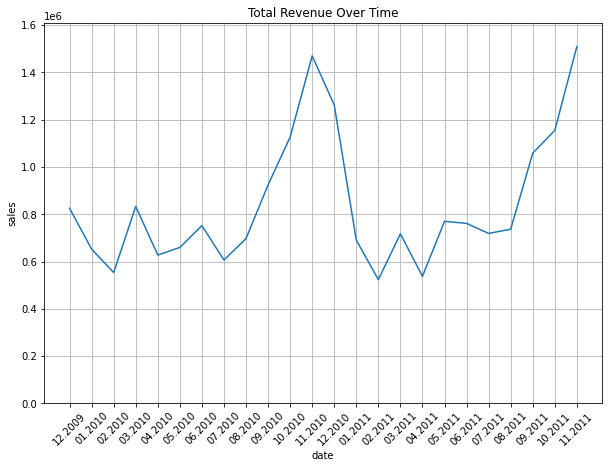

In [44]:
ax = pd.DataFrame(monthly_revenue_df.values).plot(
    grid=True,
    figsize=(10,7),
    legend=False
)

ax.set_xlabel('date')
ax.set_ylabel('sales')
ax.set_title('Total Revenue Over Time')

ax.set_ylim([0, max(monthly_revenue_df.values)+100000])

plt.xticks(
    range(len(monthly_revenue_df.index)), 
    [x.strftime('%m.%Y') for x in monthly_revenue_df.index], 
    rotation=45
)

plt.show()

Estos tipos de análisis de series de tiempo generales y amplios pueden ayudar a los especialistas en marketing a comprender mejor el desempeño general del negocio e identificar cualquier problema potencial que pueda estar ocurriendo dentro del negocio . Por lo general, es una buena idea comenzar con análisis amplios y luego profundizar en partes más granulares y específicas del negocio para obtener más análisis de productos.

#### - Time-series Repeat Customers

Otro factor importante de un negocio exitoso es qué tan bien está reteniendo clientes y cuántas compras repetidas y clientes tiene. En esta sección, vamos a analizar el número de compras mensuales repetidas y qué parte de los ingresos mensuales es atribuible a estas compras repetidas y clientes. Un negocio típico fuerte y estable tiene un flujo constante de ventas de los clientes existentes. Veamos cuántas ventas provienen de clientes habituales y existentes del negocio minorista en línea que estamos analizando

Vamos a ver el número de compras repetidas mensuales. Esto significa que un cliente realizó más de un pedido en un mes determinado. Echemos un vistazo rápido a los datos que tenemos:

In [45]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


Como habrá notado en esta instantánea de los datos, hay varios registros para una orden de compra ( usando el siguiente código: "Invoice"). Sin embargo, lo que necesitamos son los datos agregados para cada pedido, de modo que un registro en el DataFrame representa un pedido de compra. Podemos agregar estos datos brutos para cada "Invoice"

In [46]:
invoice_customer_df = df.groupby(
    by=['Invoice', 'InvoiceDate']
).agg({
    'Sales': sum,
    'Customer ID': max,
    'Country': max,
}).reset_index()

Como se puede ver en el código, estamos agrupando el DataFrame, df por "Invoice" e "InvoiceDate" y resumiendo todo las ventas. De esta manera, nuestro nuevo DataFrame, invoice_customer_df tiene un registro para cada orden de compra. El resultado se DataFrame se parece a lo siguiente:

In [47]:
invoice_customer_df.head()

,Invoice,InvoiceDate,Sales,Customer ID,Country
0,489434,2009-12-01 07:45:00,505.30,13085.0,United Kingdom
1,489435,2009-12-01 07:46:00,145.80,13085.0,United Kingdom
2,489436,2009-12-01 09:06:00,630.33,13078.0,United Kingdom
3,489437,2009-12-01 09:08:00,310.75,15362.0,United Kingdom
4,489438,2009-12-01 09:24:00,2286.24,18102.0,United Kingdom


Como puede ver aquí, cada registro del DataFrameahora tiene toda la información que necesitamos para cada pedido. Ahora, necesitamos sumar estos datos por mes y calcular la cantidad de clientes que realizaron más de una compra en un mes determinado. 

In [48]:
monthly_repeat_customers_df = invoice_customer_df.set_index('InvoiceDate').groupby([
    pd.Grouper(freq='M'), 'Customer ID'
]).filter(lambda x: len(x) > 1).resample('M').nunique()['Customer ID']

Queremos recuperar solo a aquellos clientes con más de un pedido en un mes determinado. Por último, volvemos a muestrear y agregamos por mes y contamos el número de clientes únicos en cada mes usandogroupby función en este código. Aquí, agrupamos por dos condiciones: pd.Grouper(freq='M')y CustomerID. La primera groupbycondición,  pd.Grouper(freq='M')agrupa los datos por índice InvoiceDate, en cada mes. Luego, agrupamos estos datos por cada uno CustomerID. Usando la  filterfunción, podemos subseleccionar los datos mediante una regla personalizada. Aquí, la regla de filtrado  y .lambda x: len(x) > 1resample('M')nunique



In [49]:
monthly_repeat_customers_df

InvoiceDate
2009-12-31    286
2010-01-31    148
2010-02-28    175
2010-03-31    238
2010-04-30    203
2010-05-31    228
2010-06-30    258
2010-07-31    256
2010-08-31    223
2010-09-30    278
2010-10-31    357
2010-11-30    529
2010-12-31    263
2011-01-31    153
2011-02-28    153
2011-03-31    203
2011-04-30    170
2011-05-31    281
2011-06-30    220
2011-07-31    227
2011-08-31    198
2011-09-30    272
2011-10-31    324
2011-11-30    541
Freq: M, Name: Customer ID, dtype: int64

Echemos un vistazo más de cerca a la función groupby en este código. Aquí, agrupamos por dos condiciones: pd.Grouper (freq = 'M') y Customer ID. La primera condición groupby, pd.Grouper (freq = 'M'), agrupa los datos por el índice, InvoiceDate, en cada mes. Luego, agrupamos estos datos por cada Customer ID. Usando la función de filtro, podemos subseleccionar los datos mediante una regla personalizada. Aquí, la regla de filtrado, lambda x: len (x)> 1, significa que queremos recuperar aquellos con más de un registro en el grupo. En otras palabras, queremos recuperar solo a aquellos clientes con más de un pedido en un mes determinado. Por último, volvemos a muestrear y agregamos por cada mes y contamos el número de clientes únicos en cada mes mediante el uso de remuestreo ('M') y nunique

In [50]:
monthly_unique_customers_df = df.set_index('InvoiceDate')['Customer ID'].resample('M').nunique()

Comparemos ahora estos números con el número total de clientes mensuales. Puede utilizar el  código anterior para calcular el número total de clientes mensuales:

In [51]:
monthly_unique_customers_df

InvoiceDate
2009-12-31     955
2010-01-31     720
2010-02-28     774
2010-03-31    1057
2010-04-30     942
2010-05-31     966
2010-06-30    1041
2010-07-31     928
2010-08-31     911
2010-09-30    1145
2010-10-31    1497
2010-11-30    1607
2010-12-31     885
2011-01-31     741
2011-02-28     758
2011-03-31     974
2011-04-30     856
2011-05-31    1056
2011-06-30     991
2011-07-31     949
2011-08-31     935
2011-09-30    1266
2011-10-31    1364
2011-11-30    1665
Freq: M, Name: Customer ID, dtype: int64

Si compara estos dos conjuntos de números, aproximadamente del 20 al 30% de los clientes son clientes habituales. Puede utilizar el siguiente código para calcular los porcentajes de clientes habituales para cada mes:

In [52]:
monthly_repeat_percentage = monthly_repeat_customers_df/monthly_unique_customers_df*100.0
monthly_repeat_percentage

InvoiceDate
2009-12-31    29.947644
2010-01-31    20.555556
2010-02-28    22.609819
2010-03-31    22.516556
2010-04-30    21.549894
2010-05-31    23.602484
2010-06-30    24.783862
2010-07-31    27.586207
2010-08-31    24.478595
2010-09-30    24.279476
2010-10-31    23.847695
2010-11-30    32.918482
2010-12-31    29.717514
2011-01-31    20.647773
2011-02-28    20.184697
2011-03-31    20.841889
2011-04-30    19.859813
2011-05-31    26.609848
2011-06-30    22.199798
2011-07-31    23.919916
2011-08-31    21.176471
2011-09-30    21.484992
2011-10-31    23.753666
2011-11-30    32.492492
Freq: M, Name: Customer ID, dtype: float64

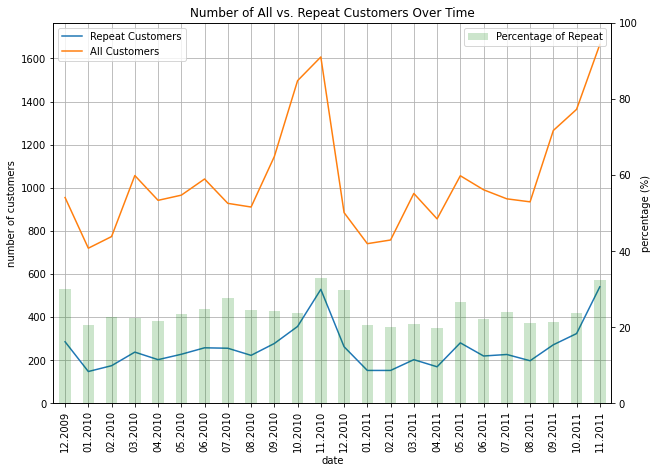

In [53]:
ax = pd.DataFrame(monthly_repeat_customers_df.values).plot(
    figsize=(10,7)
)

pd.DataFrame(monthly_unique_customers_df.values).plot(
    ax=ax,
    grid=True
)


ax2 = pd.DataFrame(monthly_repeat_percentage.values).plot.bar(
    ax=ax,
    grid=True,
    secondary_y=True,
    color='green',
    alpha=0.2
)

ax.set_xlabel('date')
ax.set_ylabel('number of customers')
ax.set_title('Number of All vs. Repeat Customers Over Time')

ax2.set_ylabel('percentage (%)')

ax.legend(['Repeat Customers', 'All Customers'])
ax2.legend(['Percentage of Repeat'], loc='upper right')

ax.set_ylim([0, monthly_unique_customers_df.values.max()+100])
ax2.set_ylim([0, 100])

plt.xticks(
    range(len(monthly_repeat_customers_df.index)), 
    [x.strftime('%m.%Y') for x in monthly_repeat_customers_df.index], 
    rotation=45
)

plt.show()

En el código anterior, notará una nueva bandera "secondary_y=True", en la funcion plot. Como sugiere el nombre, si configura esta secondary_ybandera en True, creará un nuevo "y", podemos visualizar fácilmente datos con diferentes escalas en un gráfico. El eje en el lado derecho del gráfico . Esto es especialmente útil cuando desea visualizar dos conjuntos de datos con diferentes escalas. En nuestro caso, la escala para un conjunto de nuestros datos es el número de usuarios y la escala para otro conjunto de nuestros datos es el porcentaje. Usando esto secondary_y

Como puede ver en este gráfico , el número de clientes que repiten y todos los clientes comienza a aumentar significativamente a partir de septiembre de 2011. El porcentaje de clientes queparece mantenerse bastante constante en alrededor del 20 al 30%. Este negocio minorista en línea se beneficiará de este flujo constante de , ya que ayudarán al negocio a generar un flujo estable de ventas. Ahora vamos a analizar qué parte de los ingresos mensuales proviene de éstos Clientes Recurrentes clientes habituales .

#### - Revenue from Repeat Customers

El siguiente código muestra cómo calcular los ingresos mensuales de clientes habituales :

In [54]:
monthly_rev_repeat_customers_df = invoice_customer_df.set_index('InvoiceDate').groupby([
    pd.Grouper(freq='M'), 'Customer ID'
]).filter(lambda x: len(x) > 1).resample('M').sum()['Sales']

La única diferencia entre este código y el código anterior es la función agregada, función para sumar todas las ventas de clientes habituales durante un mes determinado. Para la visualización, puede utilizar el siguiente código: sum, que sigue resample('M'). En el caso anterior, cuando estábamos calculando el número de clientes repetidos mensuales, usamos la  funcion nunique. Sin embargo, esta vez usamos la funcion "sum"

In [55]:
monthly_rev_perc_repeat_customers_df = monthly_rev_repeat_customers_df/monthly_revenue_df * 100.0

In [56]:
monthly_rev_repeat_customers_df

InvoiceDate
2009-12-31    433706.600
2010-01-31    319338.431
2010-02-28    268316.852
2010-03-31    367904.481
2010-04-30    276303.251
2010-05-31    294072.650
2010-06-30    341652.290
2010-07-31    334013.700
2010-08-31    319775.280
2010-09-30    444750.321
2010-10-31    540307.860
2010-11-30    734125.452
2010-12-31    559060.880
2011-01-31    222124.000
2011-02-28    191229.370
2011-03-31    267390.480
2011-04-30    195474.180
2011-05-31    378197.040
2011-06-30    376307.260
2011-07-31    317475.000
2011-08-31    317134.250
2011-09-30    500663.360
2011-10-31    574006.870
2011-11-30    713775.850
Freq: M, Name: Sales, dtype: float64

Una cosa a tener en cuenta en este código es la línea ax2 = ax.twinx(). Esto esencialmente hace el mismo trabajo que la secondary_y que discutimos anteriormente. La funcion twinx simplemente crea un eje y gemelo que comparte el mismo eje x y tiene el mismo efecto que la secondary_y. El gráfico resultante tiene el siguiente aspecto:

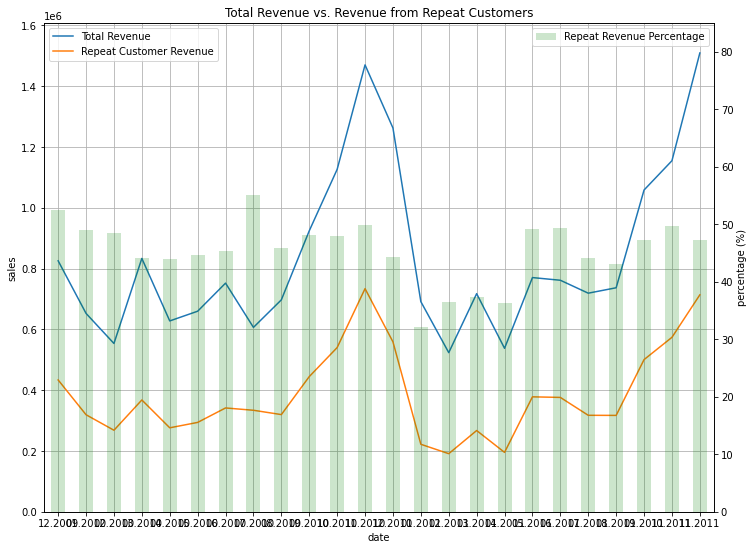

In [57]:
ax = pd.DataFrame(monthly_revenue_df.values).plot(figsize=(12,9))

pd.DataFrame(monthly_rev_repeat_customers_df.values).plot(
    ax=ax,
    grid=True,
)

ax.set_xlabel('date')
ax.set_ylabel('sales')
ax.set_title('Total Revenue vs. Revenue from Repeat Customers')

ax.legend(['Total Revenue', 'Repeat Customer Revenue'])

ax.set_ylim([0, max(monthly_revenue_df.values)+100000])

ax2 = ax.twinx()

pd.DataFrame(monthly_rev_perc_repeat_customers_df.values).plot(
    ax=ax2,
    kind='bar',
    color='g',
    alpha=0.2
)

ax2.set_ylim([0, max(monthly_rev_perc_repeat_customers_df.values)+30])
ax2.set_ylabel('percentage (%)')
ax2.legend(['Repeat Revenue Percentage'])

ax2.set_xticklabels([
    x.strftime('%m.%Y') for x in monthly_rev_perc_repeat_customers_df.index
])

plt.show()

Vemos un patrón similar al anterior, donde hay un aumento significativo en los ingresos desde septiembre de 2011. Una cosa interesante a notar aquí es el porcentaje de los ingresos mensuales de los clientes habituales. Hemos  visto que aproximadamente el 20-30% de los clientes que realizaron compras son clientes habituales. Sin embargo, en este gráfico, podemos ver que aproximadamente el 40-50% de los ingresos totales es de clientes habituales. En otras palabras, aproximadamente la mitad de los ingresos provino del 20-30% de la base de clientes que son clientes habituales. Esto muestra lo importante que es retener a los clientes existentes.

#### - Popular Items Over Time

Hasta ahora, hemos analizado los patrones generales de series de tiempo y cómo los clientes interactúan con el negocio en general, pero no cómo los clientes interactúan con productos individuales. En esta sección, vamos a explorar y analizar cómo los clientes interactúan con los productos individuales que se venden. Más específicamente , analizaremos las tendencias de los cinco más vendidos a lo largo del tiempo.
Para el análisis de artículos de tendencia de series de tiempo, contemos el número de artículos vendidos para cada producto para cada período. Eche un vistazo al siguiente código:

In [58]:
date_item_df = pd.DataFrame(
    df.set_index('InvoiceDate').groupby([
        pd.Grouper(freq='M'), 'StockCode'
    ])['Quantity'].sum()
)
date_item_df

Quantity
InvoiceDate StockCode          
2009-12-31  10002           216
            10080             4
            10109             4
            10120           115
            10125           128
...                         ...
2011-11-30  C2              173
            DCGSSGIRL         1
            DOT              47
            M              3894
            POST           1262

[64915 rows x 1 columns]

Como puede ver en este fragmento de código, estamos agrupando el DataFrame, df pr mes con  StockCode, que es el código único para cada producto, y luego sumamos las cantidades vendidas para cada mes y StockCode. Los primeros nueve registros del resultado se pueden en la tabla anterior.

Con estos datos data_item_df, veamos qué artículos se vendieron más el 30 de noviembre de 2011. Eche un vistazo al siguiente código:

Como se puede ver en el código, podemos utilizar la  funcion "sort_values" para ordenar un DataFrame con pandas por cualquier columna que queremos, proporcionando el nombre de la columna en la entrada de argumento. Aquí, estamos ordenando los datos por columna Quantity, en orden descendente, colocando la etiqueta: ascending en False. El resultado se parece al siguiente:

In [59]:
# Rank items by the last month sales
last_month_sorted_df = date_item_df.loc['2011-11-30'].sort_values(
    by='Quantity', ascending=False
).reset_index()

last_month_sorted_df

,InvoiceDate,StockCode,Quantity
0,2011-11-30,23084,14954
1,2011-11-30,84826,12551
2,2011-11-30,22197,12460
3,2011-11-30,22086,7908
4,2011-11-30,85099B,5909
...,...,...,...
2941,2011-11-30,84549,1
2942,2011-11-30,84527,1
2943,2011-11-30,90082B,1
2944,2011-11-30,90082D,1


In [60]:
# Regroup for top 5 items
date_item_df = pd.DataFrame(
    df.loc[
        df['StockCode'].isin([23084, 84826, 22197, 22086, '85099B'])
    ].set_index('InvoiceDate').groupby([
        pd.Grouper(freq='M'), 'StockCode'
    ])['Quantity'].sum()
)
date_item_df

Quantity
InvoiceDate StockCode          
2009-12-31  22086          3364
            22197          1929
            84826           124
            85099B         3771
2010-01-31  22086            23
...                         ...
2011-11-30  22086          7908
            22197         12460
            23084         14954
            84826         12551
            85099B         5909

[98 rows x 1 columns]

In [61]:
trending_itmes_df = date_item_df.reset_index().pivot('InvoiceDate','StockCode').fillna(0)

trending_itmes_df = trending_itmes_df.reset_index()
trending_itmes_df = trending_itmes_df.set_index('InvoiceDate')
trending_itmes_df.columns = trending_itmes_df.columns.droplevel(0)

trending_itmes_df

StockCode,22086,22197,23084,84826,85099B
InvoiceDate,,,,,
2009-12-31,3364.0,1929.0,0.0,124.0,3771.0
2010-01-31,23.0,737.0,0.0,62.0,3572.0
2010-02-28,0.0,1580.0,0.0,7.0,2662.0
2010-03-31,17.0,1512.0,0.0,60.0,3260.0
2010-04-30,19.0,1836.0,0.0,1.0,3947.0
2010-05-31,58.0,806.0,0.0,0.0,3616.0
2010-06-30,378.0,1786.0,0.0,60.0,4332.0
2010-07-31,196.0,2146.0,0.0,73.0,3593.0
2010-08-31,299.0,2579.0,0.0,0.0,1861.0


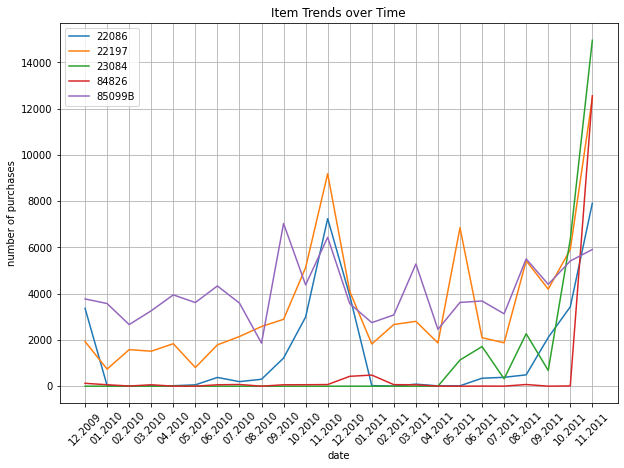

In [62]:
ax = pd.DataFrame(trending_itmes_df.values).plot(
    figsize=(10,7),
    grid=True,
)

ax.set_ylabel('number of purchases')
ax.set_xlabel('date')
ax.set_title('Item Trends over Time')

ax.legend(trending_itmes_df.columns, loc='upper left')

plt.xticks(
    range(len(trending_itmes_df.index)), 
    [x.strftime('%m.%Y') for x in trending_itmes_df.index], 
    rotation=45
)

plt.show()